In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

pd.options.mode.chained_assignment = None  

In [2]:
_60coefs = pd.read_stata('data/checkpoint_data/coefficient_plot_data/_60d_sue_coef.dta')
_2coefs = pd.read_stata('data/checkpoint_data/coefficient_plot_data/_2d_sue_coef.dta')
_60coefs_dep = pd.read_stata('data/checkpoint_data/coefficient_plot_data/_60d_deP_coef.dta')
_2coefs_dep = pd.read_stata('data/checkpoint_data/coefficient_plot_data/_2d_deP_coef.dta')
main_df = pd.read_stata('data/checkpoint_data/sue_ret_df_trimmed_year_cond.dta')

In [3]:
_10yr_rate = main_df[['_10yT', 'anndats_year', 'ibes_anndate']].sort_values('ibes_anndate').drop_duplicates(
    ['anndats_year'], keep='first')

<ipython-input-54-763702881f6c>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


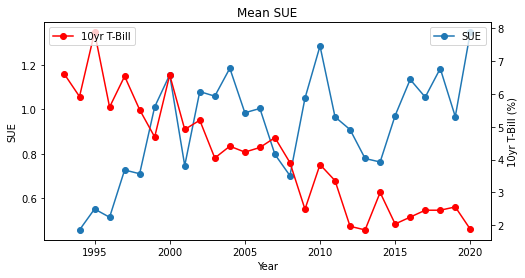

In [54]:
df = main_df[['anndats_year', 'suescore']].groupby('anndats_year').describe()['suescore']
error_bar_data = df.iloc[1:][['std', 'mean']]

fig, ax = plt.subplots(figsize=(8, 4))
ax.errorbar(error_bar_data.index, error_bar_data['mean'], marker='o', label='SUE') 
ax.set_title('Mean SUE')
ax.set_xlabel('Year')
ax.set_ylabel('SUE')

ax2=ax.twinx()
ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10yr T-Bill')
ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
ax2.legend(loc=2)

fig.savefig('images/mean_sue')
fig.show()

<ipython-input-55-ca98579ad237>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


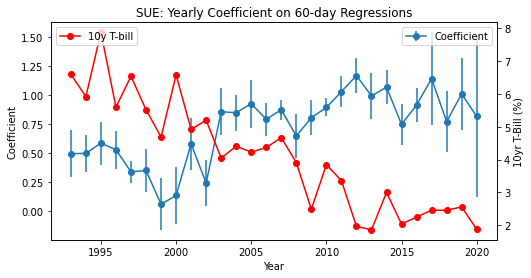

In [55]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('SUE: Yearly Coefficient on 60-day Regressions')
ax.errorbar(_60coefs['anndats_year'], _60coefs['_b_suescore'], yerr=_60coefs['_se_suescore'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

ax2=ax.twinx()
ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
ax2.legend(loc=2)

fig.savefig('images/60d_coefs_sue')
fig.show()

<ipython-input-56-cd87341f06c7>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


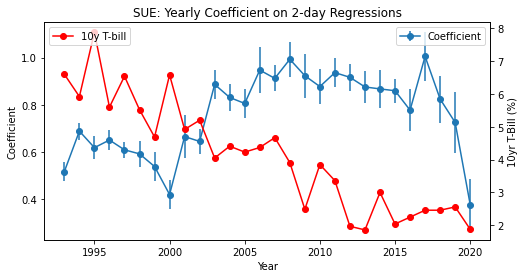

In [56]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('SUE: Yearly Coefficient on 2-day Regressions')
ax.errorbar(_2coefs['anndats_year'], _2coefs['_b_suescore'], yerr=_2coefs['_se_suescore'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

ax2=ax.twinx()
ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
ax2.legend(loc=2)

fig.savefig('images/2d_coefs_sue')
fig.show()

<ipython-input-57-7f8dfc7f9dce>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


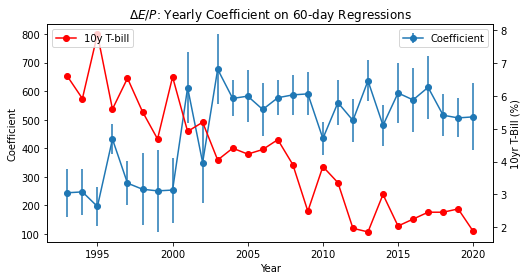

In [57]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('$\Delta E/P$: Yearly Coefficient on 60-day Regressions')
ax.errorbar(_60coefs_dep['anndats_year'], _60coefs_dep['_b_dE_P'], yerr=_60coefs_dep['_se_dE_P'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

ax2=ax.twinx()
ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
ax2.legend(loc=2)

fig.savefig('images/60d_coefs_dep')
fig.show()

<ipython-input-58-2e787a9f5717>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


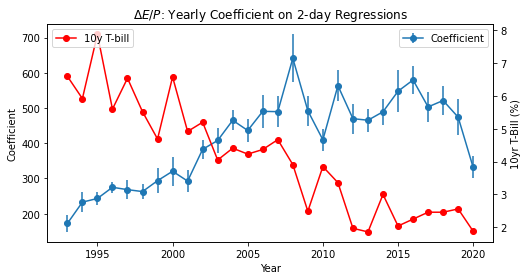

In [58]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('$\Delta E/P$: Yearly Coefficient on 2-day Regressions')
ax.errorbar(_2coefs_dep['anndats_year'], _2coefs_dep['_b_dE_P'], yerr=_2coefs_dep['_se_dE_P'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

ax2=ax.twinx()
ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
ax2.legend(loc=2)

fig.savefig('images/2d_coefs_dep')
fig.show()

## Information Leakage Graphs

In [7]:
back_30d_deP_coef = pd.read_stata('data/checkpoint_data/coefficient_plot_data/back_30d_deP_coef.dta')
back_5d_deP_coef = pd.read_stata('data/checkpoint_data/coefficient_plot_data/back_5d_deP_coef.dta')
back_1d_deP_coef = pd.read_stata('data/checkpoint_data/coefficient_plot_data/back_1d_deP_coef.dta')

back_30d_sue_coef = pd.read_stata('data/checkpoint_data/coefficient_plot_data/back_30d_sue_coef.dta')
back_5d_sue_coef = pd.read_stata('data/checkpoint_data/coefficient_plot_data/back_5d_sue_coef.dta')
back_1d_sue_coef = pd.read_stata('data/checkpoint_data/coefficient_plot_data/back_1d_sue_coef.dta')

<ipython-input-60-a8a3567c8b82>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


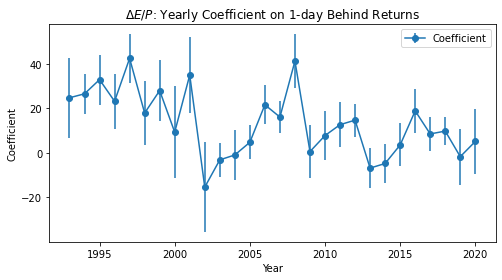

In [60]:
fig, ax = plt.subplots(figsize=(8, 4))
df = back_1d_deP_coef

ax.set_title('$\Delta E/P$: Yearly Coefficient on 1-day Behind Returns')
ax.errorbar(df['anndats_year'], df['_b_de_P'], yerr=df['_se_de_P'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

# ax2=ax.twinx()
# ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
# ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
# ax2.legend(loc=2)

fig.savefig('images/back_1d_coefs_dep')
fig.show()

<ipython-input-61-f185ef8f3dfe>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


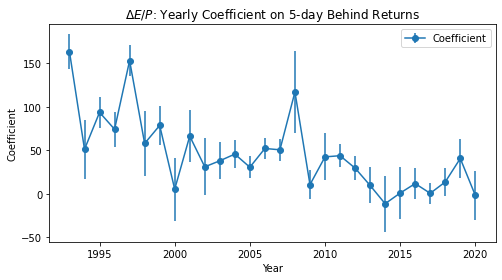

In [61]:
fig, ax = plt.subplots(figsize=(8, 4))
df = back_5d_deP_coef

ax.set_title('$\Delta E/P$: Yearly Coefficient on 5-day Behind Returns')
ax.errorbar(df['anndats_year'], df['_b_de_P'], yerr=df['_se_de_P'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

# ax2=ax.twinx()
# ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
# ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
# ax2.legend(loc=2)

fig.savefig('images/back_5d_coefs_dep')
fig.show()

<ipython-input-62-7388d6c344f3>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


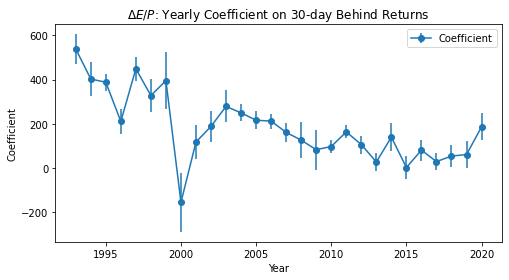

In [62]:
fig, ax = plt.subplots(figsize=(8, 4))
df = back_30d_deP_coef

ax.set_title('$\Delta E/P$: Yearly Coefficient on 30-day Behind Returns')
ax.errorbar(df['anndats_year'], df['_b_de_P'], yerr=df['_se_de_P'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

# ax2=ax.twinx()
# ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
# ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
# ax2.legend(loc=2)

fig.savefig('images/back_30d_coefs_dep')
fig.show()

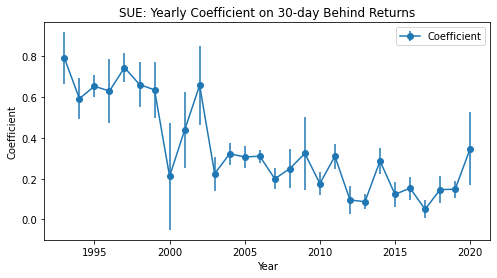

In [63]:
fig, ax = plt.subplots(figsize=(8, 4))
df = back_30d_sue_coef

ax.set_title('SUE: Yearly Coefficient on 30-day Behind Returns')
ax.errorbar(df['anndats_year'], df['_b_suescore'], yerr=df['_se_suescore'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

# ax2=ax.twinx()
# ax2.plot(df['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
# ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
# ax2.legend(loc=2)

fig.savefig('images/back_30d_coefs_sue')

<ipython-input-64-c68b3b130cbf>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


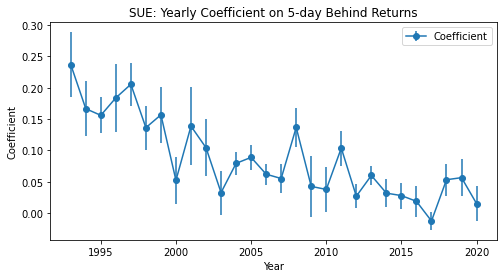

In [64]:
fig, ax = plt.subplots(figsize=(8, 4))
df = back_5d_sue_coef
ax.set_title('SUE: Yearly Coefficient on 5-day Behind Returns')
ax.errorbar(df['anndats_year'], df['_b_suescore'], yerr=df['_se_suescore'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

# ax2=ax.twinx()
# ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
# ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
# ax2.legend(loc=2)

fig.savefig('images/back_5d_coefs_sue')
fig.show()

<ipython-input-65-1fa493d49f8d>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


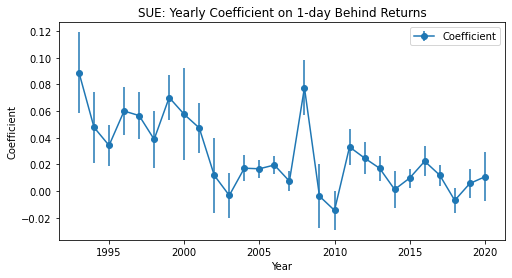

In [65]:
fig, ax = plt.subplots(figsize=(8, 4))
df = back_1d_sue_coef

ax.set_title('SUE: Yearly Coefficient on 1-day Behind Returns')
ax.errorbar(df['anndats_year'], df['_b_suescore'], yerr=df['_se_suescore'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

# ax2=ax.twinx()
# ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
# ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
# ax2.legend(loc=2)

fig.savefig('images/back_1d_coefs_sue')
fig.show()

No handles with labels found to put in legend.
<ipython-input-66-e234f8858a2c>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


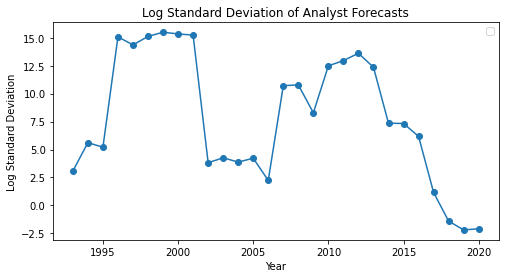

In [66]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Log Standard Deviation of Analyst Forecasts')
ax.plot(np.log(main_df.groupby('anndats_year').mean()['surpstdev'][:]), marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Log Standard Deviation')

# ax2=ax.twinx()
# ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
# ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
# ax2.legend(loc=2)

fig.savefig('images/log_standard_deviation')
fig.show()

## Full Window 

In [16]:
back_30d_to_60d_sue_coef = pd.read_stata('data/checkpoint_data/coefficient_plot_data/back_30d_to_60d_sue_coef.dta')
back_30d_to_60d_deP_coef = pd.read_stata('data/checkpoint_data/coefficient_plot_data/back_30d_to_60d_deP_coef.dta')

back_30d_to_30d_sue_coef = pd.read_stata('data/checkpoint_data/coefficient_plot_data/back_30d_to_30d_sue_coef.dta')
back_30d_to_30d_deP_coef = pd.read_stata('data/checkpoint_data/coefficient_plot_data/back_30d_to_30d_deP_coef.dta')

back_30d_to_30d_sue_coef_numest3 = pd.read_stata('data/checkpoint_data/coefficient_plot_data/back_30d_to_30d_sue_coef_numest3.dta')
back_30d_to_30d_deP_coef_numest3 = pd.read_stata('data/checkpoint_data/coefficient_plot_data/back_30d_to_30d_deP_coef_numest3.dta')

back_30d_to_30d_sue_coef_numest4 = pd.read_stata('data/checkpoint_data/coefficient_plot_data/back_30d_to_30d_sue_coef_numest4.dta')
back_30d_to_30d_deP_coef_numest4 = pd.read_stata('data/checkpoint_data/coefficient_plot_data/back_30d_to_30d_deP_coef_numest4.dta')

<ipython-input-17-c0645b4fdc07>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


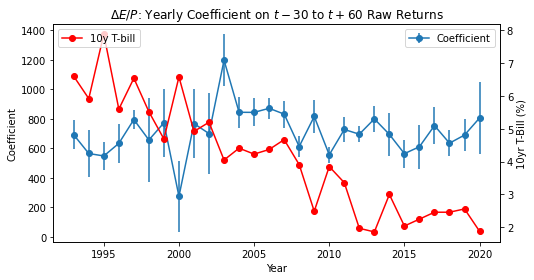

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('$\Delta E/P$: Yearly Coefficient on $t-30$ to $t+60$ Raw Returns')

df = back_30d_to_60d_deP_coef
ax.errorbar(df['anndats_year'], df['_b_de_P'], yerr=df['_se_de_P'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

ax2=ax.twinx()
ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
ax2.legend(loc=2)

fig.savefig('images/back_30d_to_60d_deP_coef')
fig.show()

<ipython-input-18-a7df3bd071b1>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


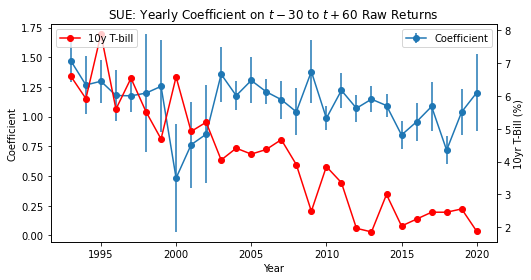

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('SUE: Yearly Coefficient on $t-30$ to $t+60$ Raw Returns')

df = back_30d_to_60d_sue_coef
ax.errorbar(df['anndats_year'], df['_b_suescore'], yerr=df['_se_suescore'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

ax2=ax.twinx()
ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
ax2.legend(loc=2)

fig.savefig('images/back_30d_to_60d_sue_coef')
fig.show()

<ipython-input-19-20024fdb5b56>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


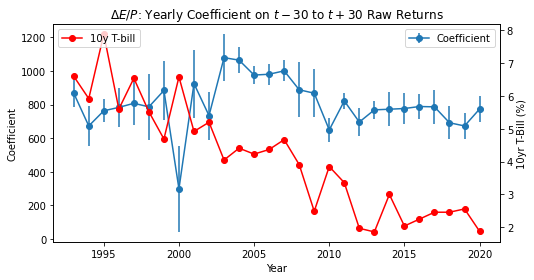

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('$\Delta E/P$: Yearly Coefficient on $t-30$ to $t+30$ Raw Returns')

df = back_30d_to_30d_deP_coef
ax.errorbar(df['anndats_year'], df['_b_de_P'], yerr=df['_se_de_P'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

ax2=ax.twinx()
ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
ax2.legend(loc=2)

fig.savefig('images/back_30d_to_30d_deP_coef')
fig.show()

<ipython-input-20-f2c37614286b>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


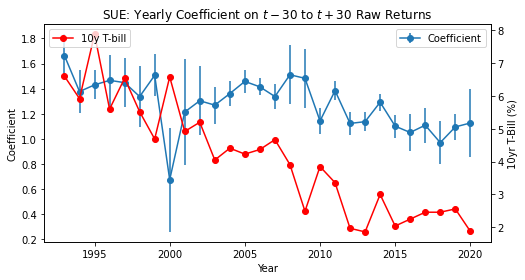

In [20]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('SUE: Yearly Coefficient on $t-30$ to $t+30$ Raw Returns')

df = back_30d_to_30d_sue_coef
ax.errorbar(df['anndats_year'], df['_b_suescore'], yerr=df['_se_suescore'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

ax2=ax.twinx()
ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
ax2.legend(loc=2)

fig.savefig('images/back_30d_to_30d_sue_coef')
fig.show()

<ipython-input-21-28eb269dd20c>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


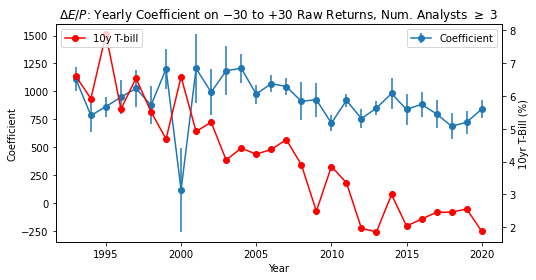

In [21]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('$\Delta E/P$: Yearly Coefficient on $-30$ to $+30$ Raw Returns, Num. Analysts $\geq$ 3')

df = back_30d_to_30d_deP_coef_numest3
ax.errorbar(df['anndats_year'], df['_b_de_P'], yerr=df['_se_de_P'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

ax2=ax.twinx()
ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
ax2.legend(loc=2)

fig.savefig('images/back_30d_to_30d_deP_coef_numest3')
fig.show()

<ipython-input-22-696646e0d4cd>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


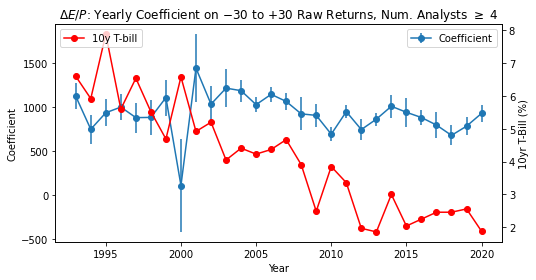

In [22]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('$\Delta E/P$: Yearly Coefficient on $-30$ to $+30$ Raw Returns, Num. Analysts $\geq$ 4')

df = back_30d_to_30d_deP_coef_numest4
ax.errorbar(df['anndats_year'], df['_b_de_P'], yerr=df['_se_de_P'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

ax2=ax.twinx()
ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
ax2.legend(loc=2)

fig.savefig('images/back_30d_to_30d_deP_coef_numest4')
fig.show()

<ipython-input-23-538328bad2e1>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


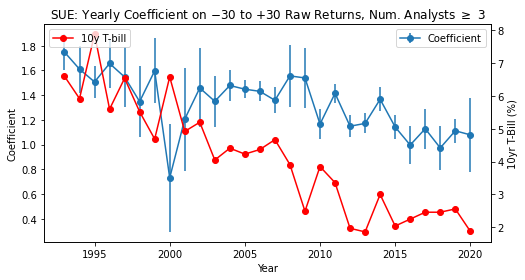

In [23]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('SUE: Yearly Coefficient on $-30$ to $+30$ Raw Returns, Num. Analysts $\geq$ 3')

df = back_30d_to_30d_sue_coef_numest3
ax.errorbar(df['anndats_year'], df['_b_suescore'], yerr=df['_se_suescore'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

ax2=ax.twinx()
ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
ax2.legend(loc=2)

fig.savefig('images/back_30d_to_30d_sue_coef_numest3')
fig.show()

<ipython-input-24-f64d90e8fde3>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


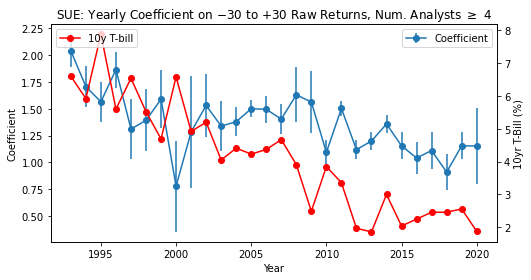

In [24]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('SUE: Yearly Coefficient on $-30$ to $+30$ Raw Returns, Num. Analysts $\geq$ 4')

df = back_30d_to_30d_sue_coef_numest4
ax.errorbar(df['anndats_year'], df['_b_suescore'], yerr=df['_se_suescore'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

ax2=ax.twinx()
ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
ax2.legend(loc=2)

fig.savefig('images/back_30d_to_30d_sue_coef_numest4')
fig.show()

<ipython-input-41-803ad189d862>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


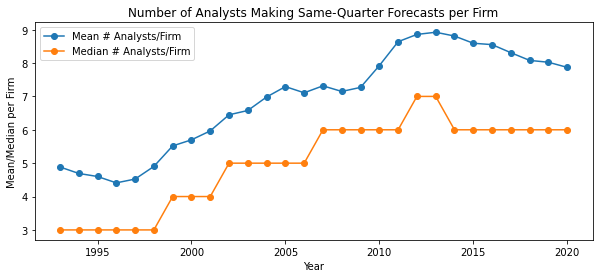

In [41]:
_mean = main_df.groupby(['anndats_year'])['NUMEST_sue'].describe()['mean']
_50 = main_df.groupby(['anndats_year'])['NUMEST_sue'].describe()['50%']

fig, ax = plt.subplots(figsize=(10, 4))
ax.set_title('Number of Analysts Making Same-Quarter Forecasts per Firm')

years = [1995, 1998, 2002, 2006, 2010, 2014, 2018]
ax.plot(_mean, label='Mean # Analysts/Firm', marker='o')
ax.plot(_50, label='Median # Analysts/Firm', marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Mean/Median per Firm')

ax.legend(loc=0)
ax2.legend(loc=2)

fig.savefig('images/num_analysts_sue')
fig.show()

## Earnings

In [69]:
diff_earnings = pd.read_stata('data/checkpoint_data/coefficient_plot_data/diff_earnings.dta')
earnings = pd.read_stata('data/checkpoint_data/coefficient_plot_data/earnings.dta')

<ipython-input-70-ed6e18c79731>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


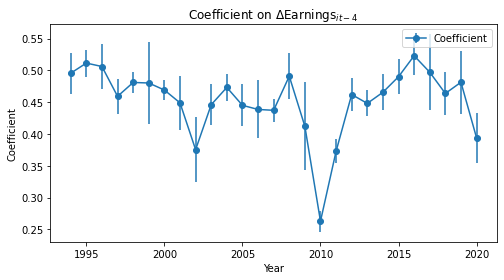

In [70]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Coefficient on $\Delta$Earnings$_{it-4}$')

df = diff_earnings
ax.errorbar(df['anndats_year'], df['_b_diff_log_earnings_lag4'], yerr=df['_se_diff_log_earnings_lag4'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

# ax2=ax.twinx()
# ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
# ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
# ax2.legend(loc=2)

fig.savefig('images/diff_earnings')
fig.show()

<ipython-input-71-540f1f742a09>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


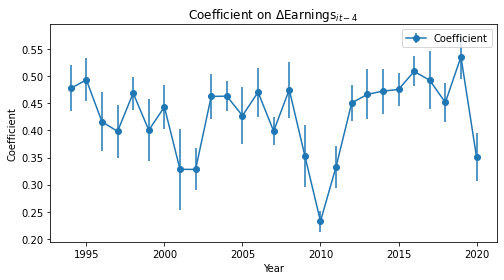

In [71]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('Coefficient on $\Delta$Earnings$_{it-4}$')

df = earnings
ax.errorbar(df['anndats_year'], df['_b_log_earnings_lag4'], yerr=df['_se_log_earnings_lag4'], marker='o', label='Coefficient')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

# ax2=ax.twinx()
# ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
# ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
# ax2.legend(loc=2)

fig.savefig('images/earnings')
fig.show()

## LTG

In [15]:
LTG_mean_dep = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean_dep.dta')
LTG_mean_sue = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean_sue.dta')
LTG_med_dep = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_med_dep.dta')
LTG_med_sue = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_med_sue.dta')

LTG_mean3_dep = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean3_dep.dta')
LTG_mean3_sue = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean3_sue.dta')
LTG_med3_dep = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_med3_dep.dta')
LTG_med3_sue = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_med3_sue.dta')

LTG_mean_dep_ff2 = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean_dep_ff2.dta')
LTG_mean_dep_ff3 = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean_dep_ff3.dta')
LTG_mean_dep_ff6 = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean_dep_ff6.dta')
LTG_mean_dep_ff1 = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean_dep_ff1.dta')
LTG_mean_dep_ff4 = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean_dep_ff4.dta')
LTG_mean_dep_ff5 = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean_dep_ff5.dta')
LTG_mean_dep_ff7 = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean_dep_ff7.dta')
LTG_mean_dep_ff9 = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean_dep_ff9.dta')
LTG_mean_dep_ff10 = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean_dep_ff10.dta')
LTG_mean_dep_ff12 = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean_dep_ff12.dta')

<ipython-input-74-67f5c19312ad>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-74-67f5c19312ad>:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


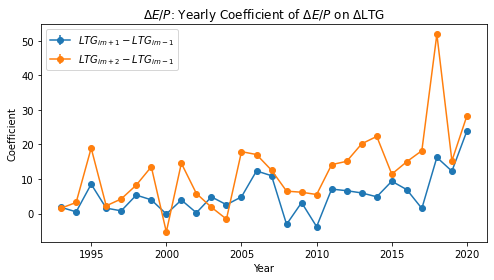

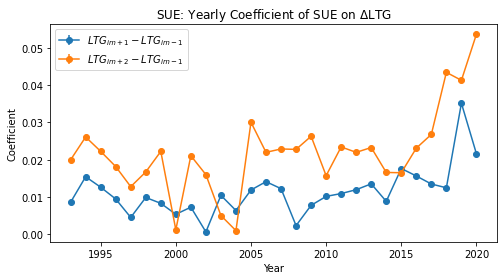

In [74]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('$\Delta E/P$: Yearly Coefficient of $\Delta E/P$ on $\Delta$LTG')

df = LTG_mean_dep
df1 = LTG_mean3_dep
ax.errorbar(df['anndats_year'], df['_b_de_P'], yerr=0, marker='o', label='$LTG_{im+1} - LTG_{im-1}$')
ax.errorbar(df1['anndats_year'], df1['_b_de_P'], yerr=0, marker='o', label='$LTG_{im+2} - LTG_{im-1}$')

ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

# ax2=ax.twinx()
# ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
# ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=0)
# ax2.legend(loc=2)

fig.savefig('images/LTG_mean_dep')
fig.show()


fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('SUE: Yearly Coefficient of SUE on $\Delta$LTG')

df = LTG_mean_sue
df1 = LTG_mean3_sue

ax.errorbar(df['anndats_year'], df['_b_suescore'], yerr=0, marker='o', label='$LTG_{im+1} - LTG_{im-1}$')
ax.errorbar(df1['anndats_year'], df1['_b_suescore'], yerr=0, marker='o', label='$LTG_{im+2} - LTG_{im-1}$')

ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

# ax2=ax.twinx()
# ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
# ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=0)
# ax2.legend(loc=2)

fig.savefig('images/LTG_mean_sue')
fig.show()

<ipython-input-75-74e6addb5459>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


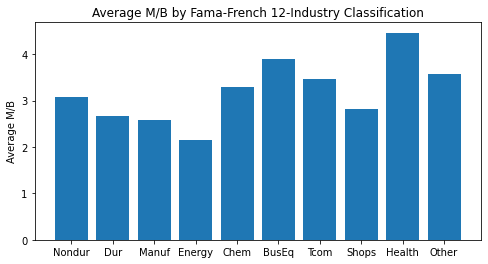

In [75]:
fig, ax = plt.subplots(figsize=(8, 4))
columns = ['Nondur', 'Dur', 'Manuf', 'Energy', 'Chem', 'BusEq', 'Tcom', 'Shops', 'Health', 'Other']

df = main_df.drop_duplicates(['fyear', 'IBES_TICKER'])
ax.bar(columns, df.groupby(['FF_12'])['mb'].mean())

ax.set_title('Average M/B by Fama-French 12-Industry Classification')
ax.set_ylabel('Average M/B')
fig.savefig('images/MB_by_FF12')
fig.show()

<ipython-input-76-0d0a4bb3c775>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


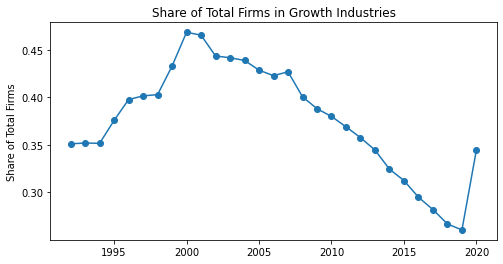

In [76]:
fig, ax = plt.subplots(figsize=(8, 4))
df = main_df.drop_duplicates(['fyear', 'IBES_TICKER'])
ax.plot(df[(df['FF_12'].isin([6, 7, 10]))].groupby(['fyear'])['IBES_TICKER'].count()/df.groupby(['fyear'])['IBES_TICKER'].count(), 
        marker='o')
ax.set_title('Share of Total Firms in Growth Industries')
ax.set_ylabel('Share of Total Firms')
# ax.legend(loc=1)
fig.savefig('images/growth_val_share_through_time')
fig.show()

<ipython-input-77-45fb792ba785>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


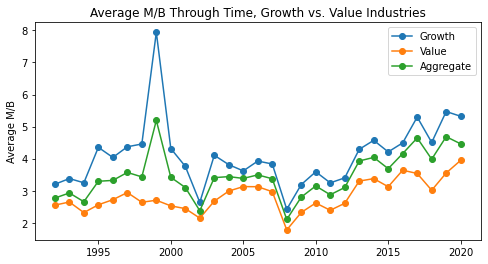

In [77]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(main_df[(main_df['FF_12'].isin([6, 7, 10]))].groupby(['fyear'])['mb'].mean(), marker='o', label='Growth')
ax.plot(main_df[(main_df['FF_12'].isin([1, 2, 3, 4, 5, 9]))].groupby(['fyear'])['mb'].mean(), marker='o', label='Value')
ax.plot(main_df.groupby(['fyear'])['mb'].mean(), marker='o', label='Aggregate')
ax.set_title('Average M/B Through Time, Growth vs. Value Industries')
ax.set_ylabel('Average M/B')
ax.legend(loc=1)
fig.savefig('images/MB_through_time_high_low')
fig.show()

<ipython-input-80-96d528e5561c>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-80-96d528e5561c>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


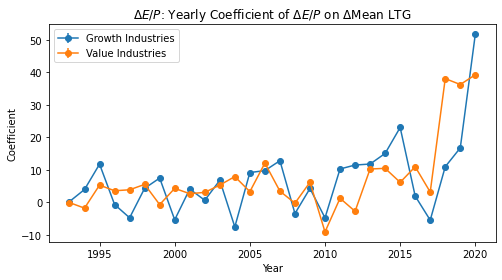

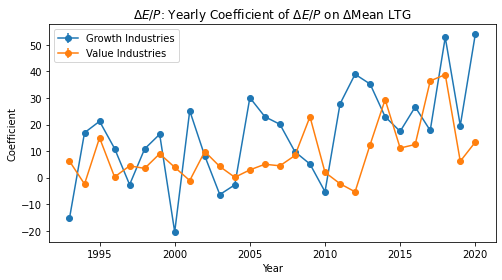

In [80]:
LTG_mean_dep_tech = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean_dep_ff_tech.dta')
LTG_mean_dep_boring = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean_dep_ff_boring.dta')
LTG_mean_dep_tech_3 = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean_dep_ff_tech_3.dta')
LTG_mean_dep_boring_3 = pd.read_stata('data/checkpoint_data/coefficient_plot_data/LTG_mean_dep_ff_boring_3.dta')

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('$\Delta E/P$: Yearly Coefficient of $\Delta E/P$ on $\Delta$Mean LTG')

dftech = LTG_mean_dep_tech
dfboring = LTG_mean_dep_boring

ax.errorbar(dftech['anndats_year'], dftech['_b_de_P'], yerr=0, marker='o', label='Growth Industries')
ax.errorbar(dfboring['anndats_year'], dfboring['_b_de_P'], 0, marker='o', label='Value Industries')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

ax.legend(loc=0)

fig.savefig('images/coef_high_mb_low_mb')
fig.show()

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('$\Delta E/P$: Yearly Coefficient of $\Delta E/P$ on $\Delta$Mean LTG')

dftech = LTG_mean_dep_tech_3
dfboring = LTG_mean_dep_boring_3

ax.errorbar(dftech['anndats_year'], dftech['_b_de_P'], yerr=0, marker='o', label='Growth Industries')
ax.errorbar(dfboring['anndats_year'], dfboring['_b_de_P'], 0, marker='o', label='Value Industries')
ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

ax.legend(loc=0)

fig.savefig('images/coef_high_mb_low_mb_3')
fig.show()

<ipython-input-79-9966fec674a6>:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


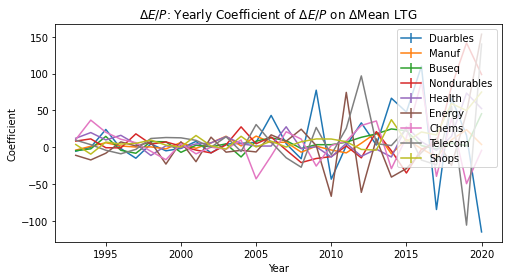

In [79]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title('$\Delta E/P$: Yearly Coefficient of $\Delta E/P$ on $\Delta$Mean LTG')

df2 = LTG_mean_dep_ff2
df3 = LTG_mean_dep_ff3
df6 = LTG_mean_dep_ff6
df1 = LTG_mean_dep_ff1
df10 = LTG_mean_dep_ff10
df12 = LTG_mean_dep_ff12
df4 = LTG_mean_dep_ff4
df5 = LTG_mean_dep_ff5
df7 = LTG_mean_dep_ff7
df9 = LTG_mean_dep_ff9

dftech = LTG_mean_dep_tech
dfboring = LTG_mean_dep_boring

ax.errorbar(df2['anndats_year'], df2['_b_de_P'], yerr=0, label='Duarbles')
ax.errorbar(df3['anndats_year'], df3['_b_de_P'], yerr=0, label='Manuf')
ax.errorbar(df6['anndats_year'], df6['_b_de_P'], yerr=0, label='Buseq')
ax.errorbar(df1['anndats_year'], df1['_b_de_P'], yerr=0, label='Nondurables')
ax.errorbar(df10['anndats_year'], df10['_b_de_P'], yerr=0, label='Health')
# ax.errorbar(df12['anndats_year'], df12['_b_de_P'], yerr=0, label='Other')
ax.errorbar(df4['anndats_year'], df4['_b_de_P'], yerr=0, label='Energy')
ax.errorbar(df5['anndats_year'], df5['_b_de_P'], yerr=0, label='Chems')
ax.errorbar(df7['anndats_year'], df7['_b_de_P'], yerr=0, label='Telecom')
ax.errorbar(df9['anndats_year'], df9['_b_de_P'], yerr=0, label='Shops')
# ax.errorbar(dftech['anndats_year'][:-1], dftech['_b_de_P'][:-1], yerr=0, marker='o', label='High M/B')
# ax.errorbar(dfboring['anndats_year'][:-1], dfboring['_b_de_P'][:-1], 0, marker='o', label='Low M/B')


ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

# ax2=ax.twinx()
# ax2.plot(_10yr_rate['anndats_year'], _10yr_rate['_10yT'], color='r', marker='o', label='10y T-bill')
# ax2.set_ylabel('10yr T-Bill (%)')

ax.legend(loc=1)
# ax2.legend(loc=2)

fig.savefig('images/LTG_mean_dep_ff2')
fig.show()

## MB on LTG

In [33]:
df = pd.read_stata('data/checkpoint_data/mb_ltg.dta')

In [34]:
LTG_MB_MEAN_r = pd.read_stata('data/checkpoint_data/coefficient_plot_data/MB_LTG_MEAN_r2.dta')
LTG_MB_MEAN_trimmed_r = pd.read_stata('data/checkpoint_data/coefficient_plot_data/MB_LTG_MEAN_trimmed_r2.dta')

LTG_MB_MEAN_yearly_r = pd.read_stata('data/checkpoint_data/coefficient_plot_data/MB_LTG_MEAN_yearly_r2.dta')
LTG_MB_MEAN_trimmed_yearly_r = pd.read_stata('data/checkpoint_data/coefficient_plot_data/MB_LTG_MEAN_trimmed_yearly_r2.dta')

<ipython-input-35-8945b6d81009>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


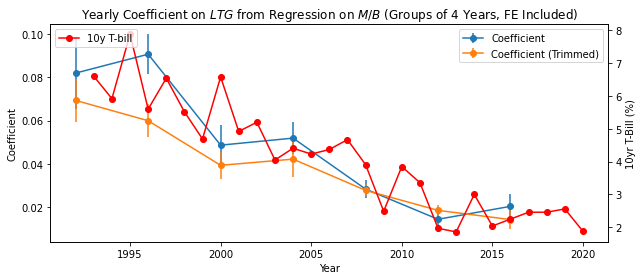

In [35]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_title('Yearly Coefficient on $LTG$ from Regression on $M/B$ (Groups of 4 Years, FE Included)')

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016]
ax.errorbar(years, LTG_MB_MEAN_r['_b_MEANEST'][:-1], yerr=LTG_MB_MEAN_r['_se_MEANEST'][:-1], marker='o', label='Coefficient')
ax.errorbar(years, LTG_MB_MEAN_trimmed_r['_b_MEANEST_trimmed_strict'][:-1], yerr=LTG_MB_MEAN_trimmed_r['_se_MEANEST_trimmed_strict'][:-1], marker='o', label='Coefficient (Trimmed)')

ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

ax.legend(loc=0)

ret_df = _10yr_rate.set_index('anndats_year')
ax2=ax.twinx()
ax2.plot(ret_df['_10yT'], color='r', marker='o', label='10y T-bill')
ax2.set_ylabel('10yr T-Bill (%)')
ax2.legend(loc=2)

ax.legend(loc=1)
ax2.legend(loc=2)

fig.savefig('images/mb_LTG')
fig.show()

<ipython-input-36-31395c784b25>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


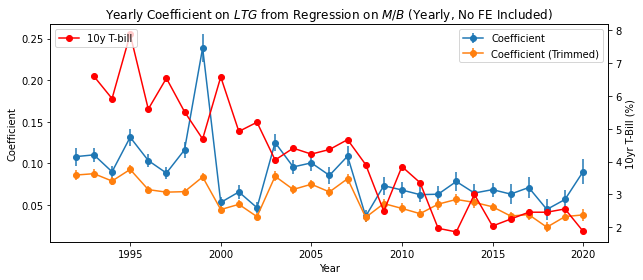

In [36]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_title('Yearly Coefficient on $LTG$ from Regression on $M/B$ (Yearly, No FE Included)')

ax.errorbar(LTG_MB_MEAN_yearly_r['fyear'], LTG_MB_MEAN_yearly_r['_b_MEANEST'], yerr=LTG_MB_MEAN_yearly_r['_se_MEANEST'], marker='o', label='Coefficient')
ax.errorbar(LTG_MB_MEAN_trimmed_yearly_r['fyear'], LTG_MB_MEAN_trimmed_yearly_r['_b_MEANEST_trimmed_strict'], yerr=LTG_MB_MEAN_trimmed_yearly_r['_se_MEANEST_trimmed_strict'], marker='o', label='Coefficient (Trimmed)')

ax.set_xlabel('Year')
ax.set_ylabel('Coefficient')

ax.legend(loc=0)

ret_df = _10yr_rate.set_index('anndats_year')
ax2=ax.twinx()
ax2.plot(ret_df['_10yT'], color='r', marker='o', label='10y T-bill')
ax2.set_ylabel('10yr T-Bill (%)')
ax2.legend(loc=2)

ax.legend(loc=1)
ax2.legend(loc=2)

fig.savefig('images/mb_LTG_yearly')
fig.show()

<ipython-input-37-d199f20ff895>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


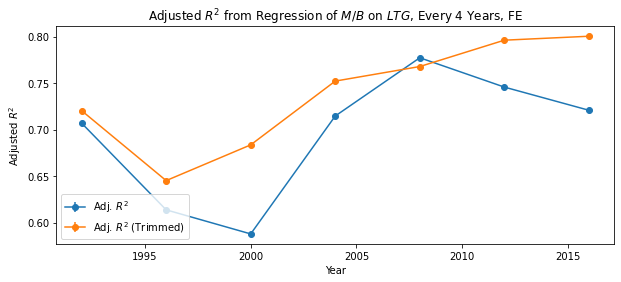

In [37]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_title('Adjusted $R^2$ from Regression of $M/B$ on $LTG$, Every 4 Years, FE')

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016]
ax.errorbar(years, LTG_MB_MEAN_r['_eq2_stat_1'][:-1], yerr=0, marker='o', label='Adj. $R^2$')
ax.errorbar(years, LTG_MB_MEAN_trimmed_r['_eq2_stat_1'][:-1], yerr=0, marker='o', label='Adj. $R^2$ (Trimmed)')

ax.set_xlabel('Year')
ax.set_ylabel('Adjusted $R^2$')

ax.legend(loc=0)

# ret_df = _10yr_rate.set_index('anndats_year')
# ax2=ax.twinx()
# ax2.plot(ret_df['_10yT'], color='r', marker='o', label='10y T-bill')
# ax2.set_ylabel('10yr T-Bill (%)')
# ax2.legend(loc=2)

ax.legend(loc=3)
# ax2.legend(loc=2)

fig.savefig('images/mb_LTG_r')
fig.show()

<ipython-input-38-ef3449f88a56>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


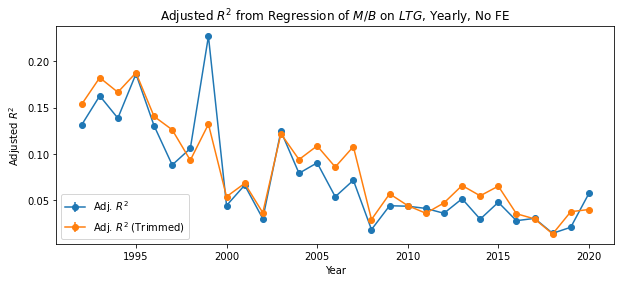

In [38]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_title('Adjusted $R^2$ from Regression of $M/B$ on $LTG$, Yearly, No FE')

ax.errorbar(LTG_MB_MEAN_yearly_r['fyear'], LTG_MB_MEAN_yearly_r['_eq2_stat_1'], yerr=0, marker='o', label='Adj. $R^2$')
ax.errorbar(LTG_MB_MEAN_trimmed_yearly_r['fyear'], LTG_MB_MEAN_trimmed_yearly_r['_eq2_stat_1'], yerr=0, marker='o', label='Adj. $R^2$ (Trimmed)')

ax.set_xlabel('Year')
ax.set_ylabel('Adjusted $R^2$')

ax.legend(loc=0)

# ret_df = _10yr_rate.set_index('anndats_year')
# ax2=ax.twinx()
# ax2.plot(ret_df['_10yT'], color='r', marker='o', label='10y T-bill')
# ax2.set_ylabel('10yr T-Bill (%)')
# ax2.legend(loc=2)

ax.legend(loc=3)
# ax2.legend(loc=2)

fig.savefig('images/mb_LTG_r_yearly')
fig.show()

<ipython-input-39-ef8c13164c57>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


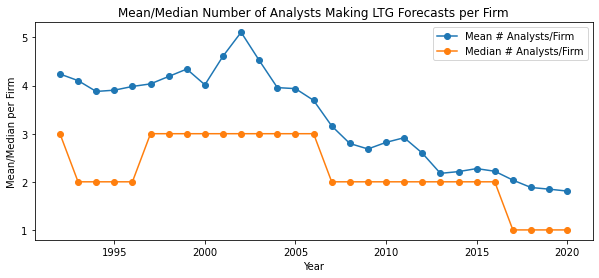

In [39]:
_mean = df.groupby(['fyear'])['NUMEST'].describe()['mean']
_50 = df.groupby(['fyear'])['NUMEST'].describe()['50%']

fig, ax = plt.subplots(figsize=(10, 4))
ax.set_title('Mean/Median Number of Analysts Making LTG Forecasts per Firm')

years = [1995, 1998, 2002, 2006, 2010, 2014, 2018]
ax.plot(_mean, label='Mean # Analysts/Firm', marker='o')
ax.plot(_50, label='Median # Analysts/Firm', marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Mean/Median per Firm')

ax.legend(loc=0)
ax2.legend(loc=2)

fig.savefig('images/num_analysts')
fig.show()

## Investor Learning

In [3]:
inv_learn_df = pd.read_stata('data/checkpoint_data/investor_learning.dta')

In [54]:
df = inv_learn_df[['_2d_ret', '_30d_ret_after', '_2d_ret_ahead']]
df['color'] = df['_2d_ret_ahead'].apply(lambda x: 1 if x > 0 else 0)
df_color = df[df['color']==1]
df_no_color = df[df['color']==0]

(-45.45658697897999, 46.03360607637998, -92.4409964328438, 206.1657706511691)

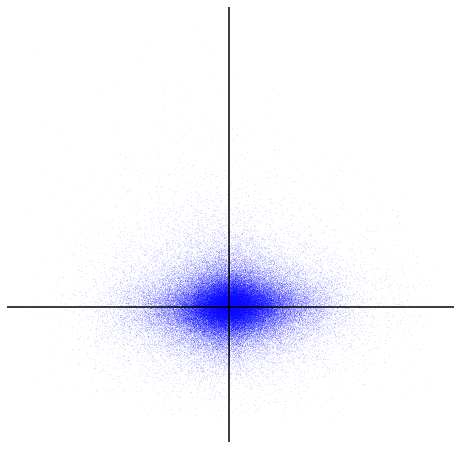

In [62]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df_color['_2d_ret'], 
           df_color['_30d_ret_after'],
           color='b', 
           s=0.001)
# ax.scatter(df_no_color['_2d_ret'], 
#            df_no_color['_30d_ret_after'],
#            color='r',
#            s=0.001)
ax.axvline(0, color='k')
ax.axhline(0, color='k')
ax.axis('off')